In [246]:
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
import numpy as np
from math import pi

In [247]:
f_sample = 100     # [Hz] / [fps]
f_signal = 51      # [Hz]

In [248]:
N = int(1e5)        # [-] number of points to calculate

In [249]:
p_sample = 1/f_sample  # [s]
p_signal = 1/f_signal  # [s]

In [250]:
t = np.linspace(0,1,N)

In [251]:
signal = np.sin(t*f_signal*2*pi)
sample_times = np.linspace(0,1,f_sample+1)[:-1]
sampled_signal = np.sin(2*pi*f_signal*sample_times)

In [257]:
yf = rfft(sampled_signal)
xf = rfftfreq(f_sample, 1 / f_sample)

# normalize
yf = yf / sum(yf)

f_alias = xf[np.argmax(abs(yf))]

if abs(f_alias - f_signal) < 0.5:
    print("no aliasing")
    alias = signal
else:
    print(f"aliasing frequency is {f_alias}")
    # note: a 180 degrees phase shift occurs
    alias = -1*np.sin(t*f_alias*2*pi)



aliasing frequency is 49.0


Shown are the original signal, the sample times, and the signal that the sampling device sees.

(0.0, 0.1)

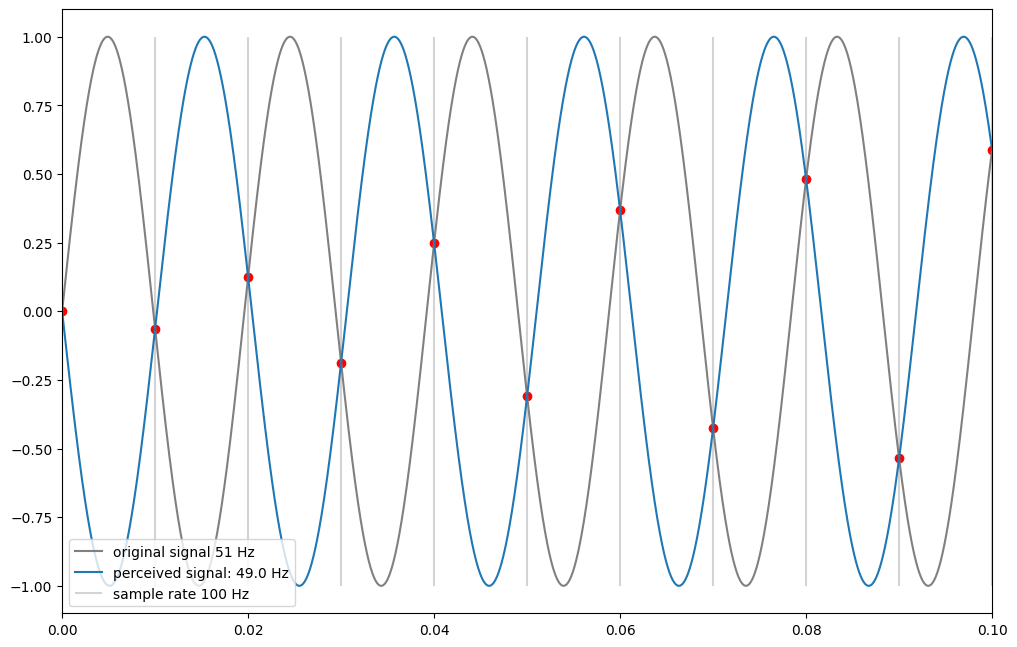

In [259]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(t,signal,color='grey', label=f"original signal {f_signal} Hz")
plt.plot(t,alias, label=f"perceived signal: {f_alias} Hz")
plt.scatter(sample_times, sampled_signal,color='red')
plt.vlines(sample_times,-1,1, label=f"sample rate {f_sample} Hz", color='lightgrey')
plt.plot
plt.legend(loc='lower left')
plt.xlim(sample_times[0],sample_times[10])

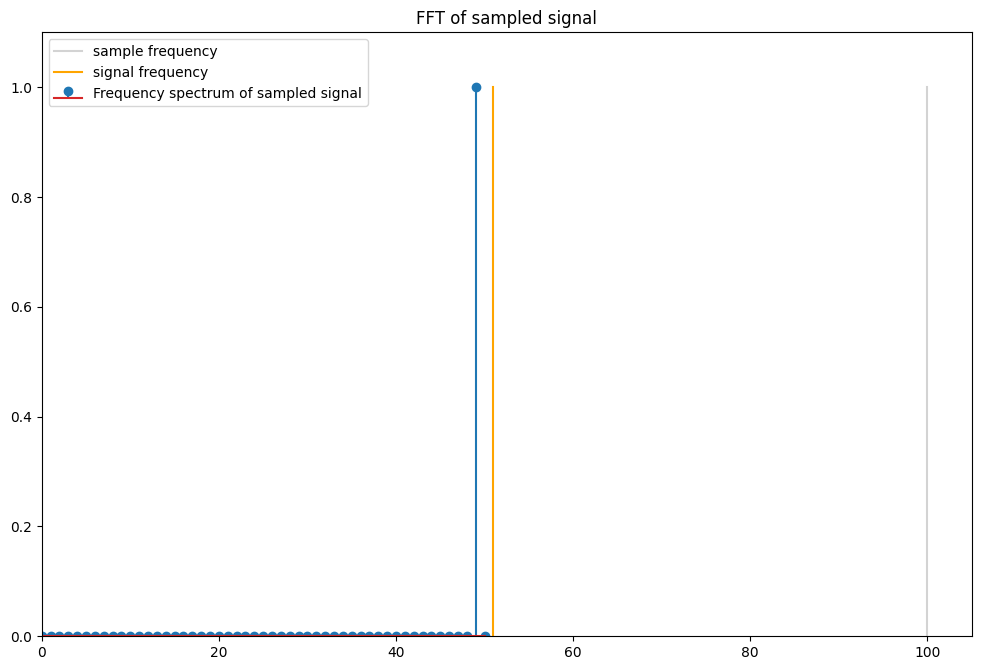

In [266]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

plt.stem(xf, np.abs(yf), label="Frequency spectrum of sampled signal")
plt.xlim(0,round(1.05*f_sample))
plt.ylim(0,1.1*max(abs(yf)))
plt.title("FFT of sampled signal")
plt.plot([f_sample, f_sample], [0, 1], label='sample frequency', c='lightgrey')
plt.plot([f_signal, f_signal], [0, 1], label='signal frequency', c='orange')

plt.legend()
plt.show()